# Lab 5
Ming Fong

Cameron Shotwell

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression


In [5]:
df = pd.read_csv('data/Physics 5BL Lab 5.csv')
df

,Trial,A45,A85,A125,A165,A205,A245,B45,B65,B85,B105,B125,B145,C239,C279,C319,C359,C399,C439
0,1,0.08,0.12,0.13,0.19,0.20,0.24,0.20,0.200,0.50,0.98,0.50,0.97,0.46,0.58,0.65,0.70,0.70,0.88
1,2,0.10,0.10,0.12,0.20,0.20,0.24,0.20,0.220,0.50,0.88,0.53,0.94,0.44,0.60,0.68,0.59,0.60,0.79
2,3,0.09,0.10,0.12,0.18,0.21,0.24,0.19,0.240,0.22,0.74,0.56,1.00,0.48,0.59,0.69,0.68,0.80,0.80
3,4,0.08,0.10,0.15,0.18,0.24,0.21,0.21,0.240,0.25,0.51,0.40,0.98,0.49,0.65,0.60,0.75,0.86,0.88
4,5,0.08,0.10,0.12,0.15,0.23,0.22,0.22,0.240,0.38,0.52,0.71,0.90,0.56,0.54,0.66,0.96,0.73,0.86
5,6,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.250,0.50,0.56,0.71,0.60,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,0.24,0.250,0.53,0.58,0.74,0.83,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.245,0.50,0.55,0.75,1.00,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.240,0.46,0.55,0.72,0.79,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.280,0.48,0.54,0.81,0.86,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
c_masses = np.array([239,279,319,359,399,439])
c_masses = c_masses / 1000
c_masses * 9.8

array([2.3422, 2.7342, 3.1262, 3.5182, 3.9102, 4.3022])

In [6]:
df.mean()

Trial    5.5000
A45      0.0860
A85      0.1040
A125     0.1280
A165     0.1800
A205     0.2160
A245     0.2300
B45      0.2040
B65      0.2405
B85      0.4320
B105     0.6410
B125     0.6430
B145     0.8870
C239     0.4860
C279     0.5920
C319     0.6560
C359     0.7360
C399     0.7380
C439     0.8420
dtype: float64

In [7]:
df.sem()

Trial    0.957427
A45      0.004000
A85      0.004000
A125     0.005831
A165     0.008367
A205     0.008124
A245     0.006325
B45      0.004989
B65      0.006517
B85      0.035270
B105     0.052777
B125     0.042532
B145     0.039414
C239     0.020396
C279     0.017720
C319     0.015684
C359     0.061693
C399     0.044317
C439     0.019596
dtype: float64

In [23]:
df[df.columns[-6:]].mean().values

array([0.486, 0.592, 0.656, 0.736, 0.738, 0.842])

In [38]:
x_dat = c_masses * 9.8
y_dat = df[df.columns[-6:]].mean().values
y_err = df[df.columns[-6:]].sem().values

In [39]:
# Define model functions  -- the independent variable has to be the first argument

#proportional model y=mx
def model_prop(x,m):
    return m*x

#linear model y=mx+c
def model_lin(x,m,c):
    return m*x + c

# Set initial parameters m0 and b0
mInit=0.025

# Define new frequency array, fModel, for displaying the model
fModel = np.linspace(0,10)

In [53]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit=0.025
cInit=-0.05

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.4f} ± {1:5.4f} m/N'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.4f} ±  {lin_err[1]:.4f} m")


m = 0.1675 ± 0.0170 m/N
c = 0.1186 ±  0.0576 m


In [56]:
# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)


#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)

print('χ2 =', chi2_lin) #unformatted, as an example


χ2 = 3.8972933701948667


In [67]:
chi2_lin/4

0.9743233425487167

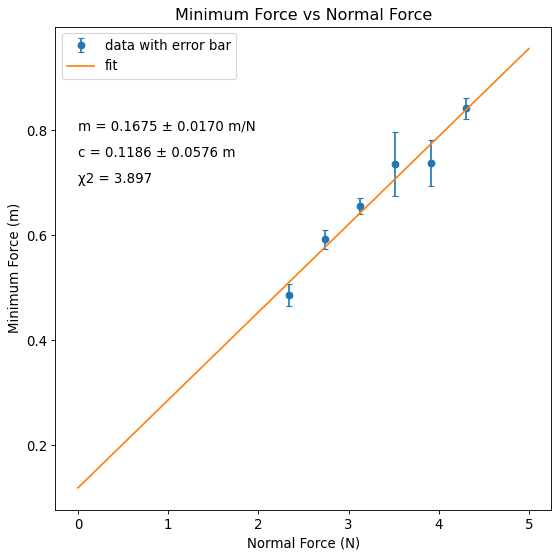

In [62]:
# Best-fit plot with error bars, parameters, chisq

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Data with error bars
plt.errorbar(x_dat, y_dat, y_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")

# Best linear fit 
# could also use: plt.plot(np.linspace(0,10), model_lin(np.linspace(0,10), lin_opt[0], lin_opt[1]), label='fit')
plt.errorbar(np.linspace(0,5), model_lin(np.linspace(0,5), lin_opt[0], lin_opt[1]), label='fit')

# Axes label and title
plt.title("Minimum Force vs Normal Force")
plt.xlabel("Normal Force (N)")
plt.ylabel("Minimum Force (m)")

# Best fit parameters, uncertainties, and chisq
plt.text(0,.8, "m = %5.4f \u00b1 %5.4f m/N" % (lin_opt[0], lin_err[0]))
plt.text(0,.75, "c = %5.4f \u00b1 %5.4f m" % (lin_opt[1], lin_err[1]))
plt.text(0,.7, "χ2 = %5.3f" % chi2_lin)
plt.legend()
plt.show()

In [63]:
lr1 = LinearRegression(fit_intercept=True)
lr1.fit(x_dat.reshape(-1, 1), y_dat)
lr1.coef_

array([0.16749271])

In [64]:
lr1.intercept_

0.11855571428571399

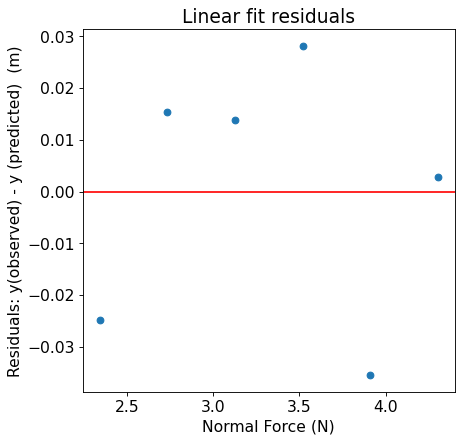

In [66]:
# Residuals plot

# Residuals
r_lin = y_dat- y_lin

# Sets figure size etc.
fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '14'})

# Residuals
plt.errorbar(x_dat, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals")
plt.xlabel("Normal Force (N)")
plt.ylabel("Residuals: y(observed) - y (predicted)  (m)")
plt.show()